# Import the necessary libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer

from joblib import load

import seaborn as sns

# Import train & test data

In [13]:
# Load Training and Testing Data

# X_train: Feature matrix for training
# y_train: Target labels for training
X_train = pd.read_csv('./Data/X_train.csv')
y_train = pd.read_csv('./Data/y_train.csv')

# X_test: Feature matrix for testing
# y_test: Target labels for testing
X_test = pd.read_csv('./Data/X_test.csv')
y_test = pd.read_csv('./Data/y_test.csv')


In [14]:
# Drop unnecessary columns that are not used in model trainingumn
X_train = X_train.drop(columns=['mp_id_bg', 'formula', 'symmetry'])
X_test = X_test.drop(columns=['mp_id_bg', 'formula', 'symmetry'])

In [15]:
# Define output filename prefix for saved results
outname = 'cost_sensitive'

# Load trained model

In [16]:
# Load cost-sensitive Random Forest model
cs_rf = load('./Trained model/CS_RF.joblib') 
# Load cost-sensitive XGBoost model
cs_xgb = load('./Trained model/CS_XGB.joblib') 

## CS-RF classification report

In [17]:
print('CS-RF')

# Retrieve the best cross-validation F1-score from the trained CS-RF model
cv_rf = cs_rf.best_score_
print('CV : ', cv_rf)

# Make predictions on test data
y_pred_rf = cs_rf.predict(X_test)

# Make predictions on test data
print('TEST!')
print(classification_report(y_test, y_pred_rf))

CS-RF
CV :  0.7543324268448991
TEST!
              precision    recall  f1-score   support

       False       0.92      0.95      0.94       840
        True       0.83      0.76      0.79       274

    accuracy                           0.90      1114
   macro avg       0.88      0.85      0.86      1114
weighted avg       0.90      0.90      0.90      1114



## CS-XGB classification report

In [18]:
print('CS-XGB')

# Retrieve the best cross-validation F1-score from the trained CS-XGB model
cv_xgb = cs_rf.best_score_
print('CV : ', cv_xgb)

# Make predictions on test data
y_pred_xgb = cs_xgb.predict(X_test)

# Print classification report for CS-XGB
print('TEST!')
print(classification_report(y_test, y_pred_xgb))

CS-XGB
CV :  0.7543324268448991
TEST!
              precision    recall  f1-score   support

       False       0.93      0.95      0.94       840
        True       0.85      0.76      0.80       274

    accuracy                           0.91      1114
   macro avg       0.89      0.86      0.87      1114
weighted avg       0.91      0.91      0.91      1114



# Evaluation

In [19]:
# Function to evaluate model performance using precision, recall, and F1-score
def eval_score(y_test, y_pred):

    precision_avg = precision_score(y_test, y_pred)
    recall_avg = recall_score(y_test, y_pred)
    f1_avg = f1_score(y_test, y_pred)
    return precision_avg, recall_avg, f1_avg

In [20]:
# Store cross-validation results
df_cv = pd.DataFrame({'Metrics':'CV', 'RF':cv_rf, 
                      'XGB':cv_xgb}, index=[0])

# Compute test set evaluation metrics for both models
rf_score = eval_score(y_test, y_pred_rf)
xgb_score = eval_score(y_test, y_pred_xgb)

# Create a DataFrame to store precision, recall, and F1-score for both models
metrics_name = ['Precission', 'Recall', 'F1']
df_score = pd.DataFrame({'Metrics':metrics_name, 'RF':rf_score, 'XGB':xgb_score})

# Combine cross-validation and test evaluation results
df_eval = pd.concat([df_cv,df_score])

# Save evaluation results to CSV
df_eval.to_csv('./Result/Eval.csv', index=False)
df_eval

,Metrics,RF,XGB
0,CV,0.754332,0.754332
0,Precission,0.828000,0.846154
1,Recall,0.755474,0.762774
2,F1,0.790076,0.802303


# Generate Confusion Matrices

## CS-RF

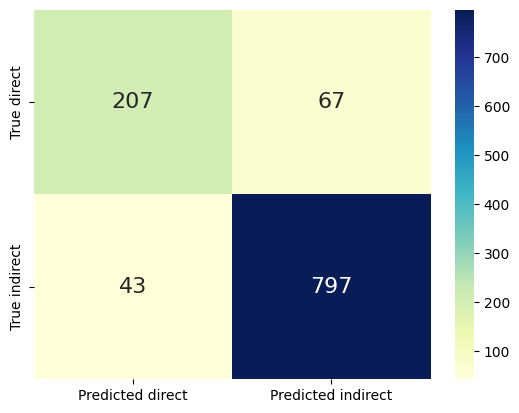

In [21]:
# Plot confusion matrix for CS-RF
cm_rf =sns.heatmap(confusion_matrix(y_test, y_pred_rf, labels=[True,False]),cmap='YlGnBu',
                      fmt = '.0f', 
                      annot=True, annot_kws={"size": 16},
                      xticklabels=['Predicted direct','Predicted indirect'],
                      yticklabels=['True direct','True indirect'])

# Save confusion matrix for CS-RF
plt.savefig('./Result/'+ outname +'_cm_rf.png', dpi=300)
plt.show()

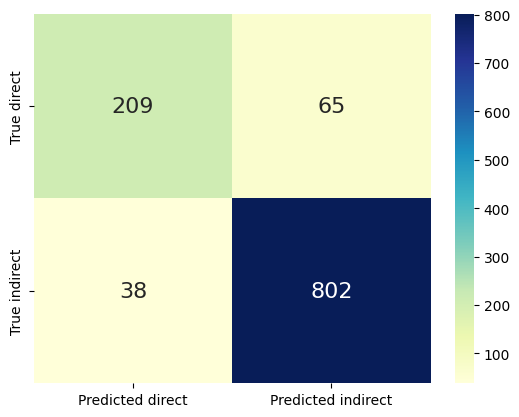

In [22]:
# Plot confusion matrix for CS-XGB
cm_xgb =sns.heatmap(confusion_matrix(y_test, y_pred_xgb, labels=[True,False]),cmap='YlGnBu',
                      fmt = '.0f', 
                      annot=True, annot_kws={"size": 16},
                      xticklabels=['Predicted direct','Predicted indirect'],
                      yticklabels=['True direct','True indirect'])

# Save confusion matrix for CS-XGB
plt.savefig('./Result/'+ outname +'_cm_xgb.png', dpi=300)
plt.show()